# **Principal Component Analysis (PCA) on Heart Attack Risk Dataset**

---
##  **Objective**
The goal of this project is to apply **Principal Component Analysis (PCA)** to reduce dimensionality in a **heart attack risk dataset** while retaining key information. PCA helps in **visualizing high-dimensional data** and selecting the most influential features.

---

Load the Dataset

We begin by **Importing necessary liabraries and then loading the dataset** from the specified path and inspecting its structure.

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the dataset
file_path = 'heart_attack_prediction_dataset.csv'
df = pd.read_csv(file_path)

##  Data Preprocessing

### 
- **Dropped unnecessary columns** (`Patient ID`, `Country`, `Continent`, `Hemisphere`)

In [3]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"], errors="ignore")
df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Encode categorical variables**:
  - `"Sex"` → `0 (Male)`, `1 (Female)`
  - `"Diet"` → Encoded numerically

In [4]:
# Convert 'Sex' to numeric values (0 = Male, 1 = Female)
df_cleaned["Sex"] = df_cleaned["Sex"].map({"Male": 0, "Female": 1})

# Encode categorical variable 'Diet' if it exists
if "Diet" in df_cleaned.columns:
    label_encoder = LabelEncoder()
    df_cleaned["Diet"] = label_encoder.fit_transform(df_cleaned["Diet"])

df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,0,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,0,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,1,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,0,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,0,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Handled Blood Pressure** by **splitting Systolic & Diastolic values**

In [5]:
# Handle 'Blood Pressure' - Split into Systolic and Diastolic
if "Blood Pressure" in df_cleaned.columns:
    df_cleaned[['Systolic BP', 'Diastolic BP']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(float)
    df_cleaned.drop(columns=['Blood Pressure'], inplace=True)

df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


- **Checked for missing values** and **imputed if necessary**

In [6]:
# Ensure all values are numeric and drop any non-numeric columns
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

df_cleaned.dropna(inplace=True)
df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


In [7]:
# Separate features & target
features = df_cleaned.drop(columns=["Heart Attack Risk"])
target = df_cleaned["Heart Attack Risk"]

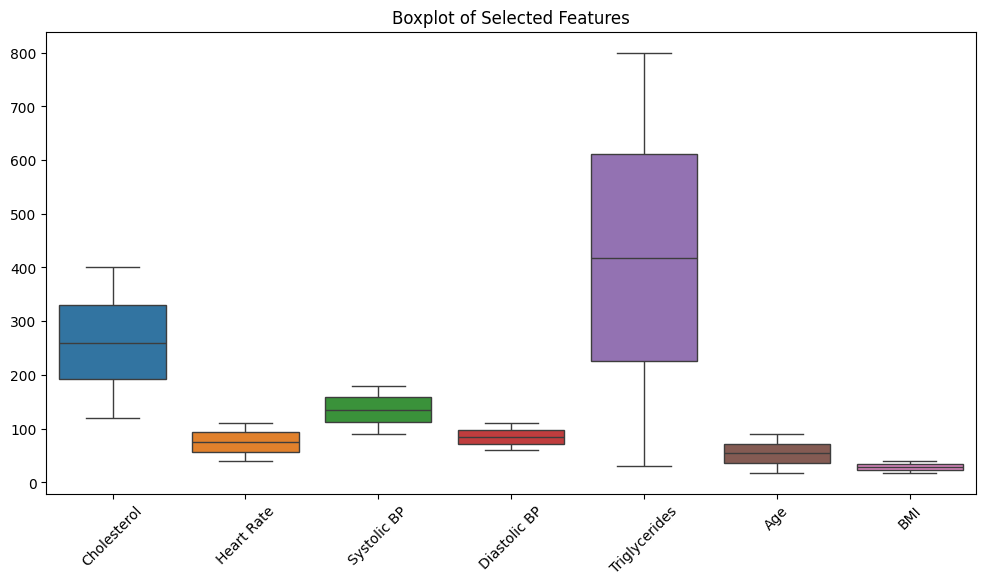

In [8]:
# Define key features relevant to PCA
key_features = ["Cholesterol", "Heart Rate", "Systolic BP", "Diastolic BP", "Triglycerides", "Age", "BMI"]

# Create subplots for selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[key_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Selected Features")
plt.show()

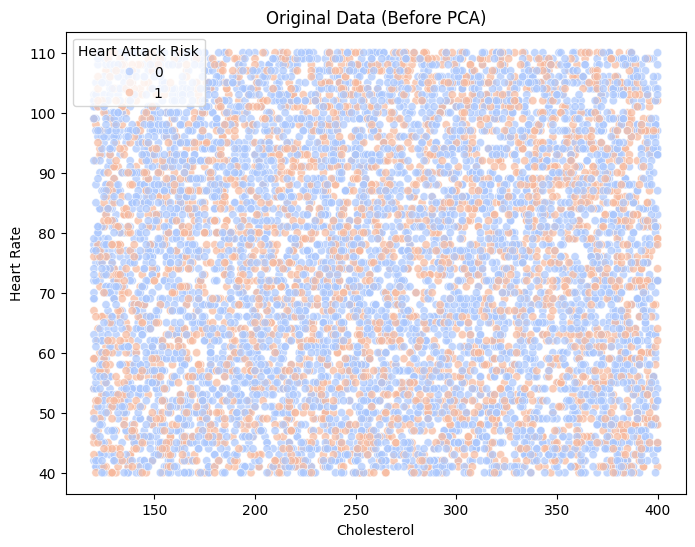

In [9]:
# Select two features for comparison (choose based on correlation)
feature_x = "Cholesterol"  # Example feature
feature_y = "Heart Rate"   # Example feature

# Plot original data
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cleaned[feature_x], y=df_cleaned[feature_y], hue=df_cleaned["Heart Attack Risk"], palette="coolwarm", alpha=0.7)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Original Data (Before PCA)")
plt.legend(title="Heart Attack Risk")
plt.show()


### Train-Test-Split

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset before applying PCA
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Standardization

In [11]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform() to prevent data leakage

### PCA Application

In [12]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust components based on explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.0755653  0.04933362]
Total Explained Variance: 0.12489892150619358


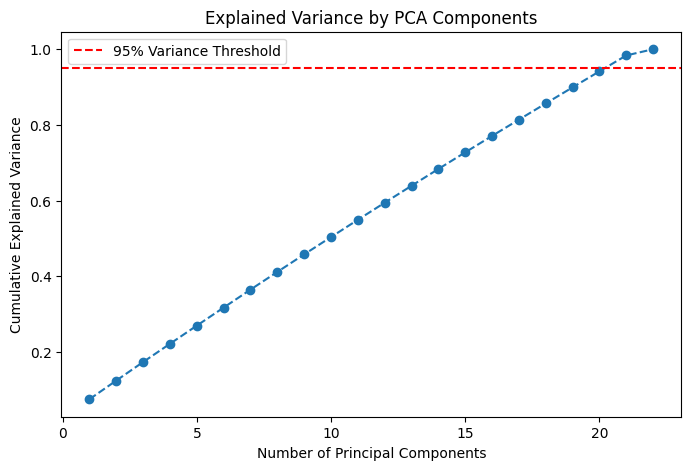

In [14]:
# Apply PCA with all components
pca = PCA()
pca.fit(X_train_scaled)

# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.legend()
plt.show()

In [15]:
# Ensure all values are numeric and drop any non-numeric columns
df_numeric = df_cleaned.drop(columns=["Heart Attack Risk"]).apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='any')

# Identify Key Features Contributing to PCA
num_components = pca.components_.shape[0]
component_labels = [f"PC{i+1}" for i in range(num_components)]
feature_importance = pd.DataFrame(
    data=pca.components_,
    columns=df_numeric.columns,
    index=component_labels
)

print("\n🔹 Key Features Contributing to PCA:")
print(feature_importance.T.sort_values(by="PC1", ascending=False))  # Sort by most influential features


🔹 Key Features Contributing to PCA:
                                      PC1       PC2       PC3       PC4  \
Smoking                          0.699224  0.012113 -0.001164  0.008875   
Age                              0.438149 -0.164824  0.010806 -0.150404   
Family History                   0.037811 -0.361231  0.099374 -0.278858   
Sedentary Hours Per Day          0.022732  0.149937  0.215075 -0.109510   
Cholesterol                      0.021701  0.443793  0.228214 -0.079195   
Previous Heart Problems          0.012792  0.265251 -0.266274 -0.137775   
Triglycerides                    0.010976 -0.231035  0.145218  0.314335   
Income                           0.008575 -0.199132  0.223634 -0.044670   
BMI                              0.005579  0.190342 -0.335082 -0.258632   
Obesity                          0.001443 -0.129887 -0.000232  0.349726   
Alcohol Consumption             -0.000478  0.087054 -0.328684 -0.222050   
Medication Use                  -0.001657  0.107580 -0.148764 -

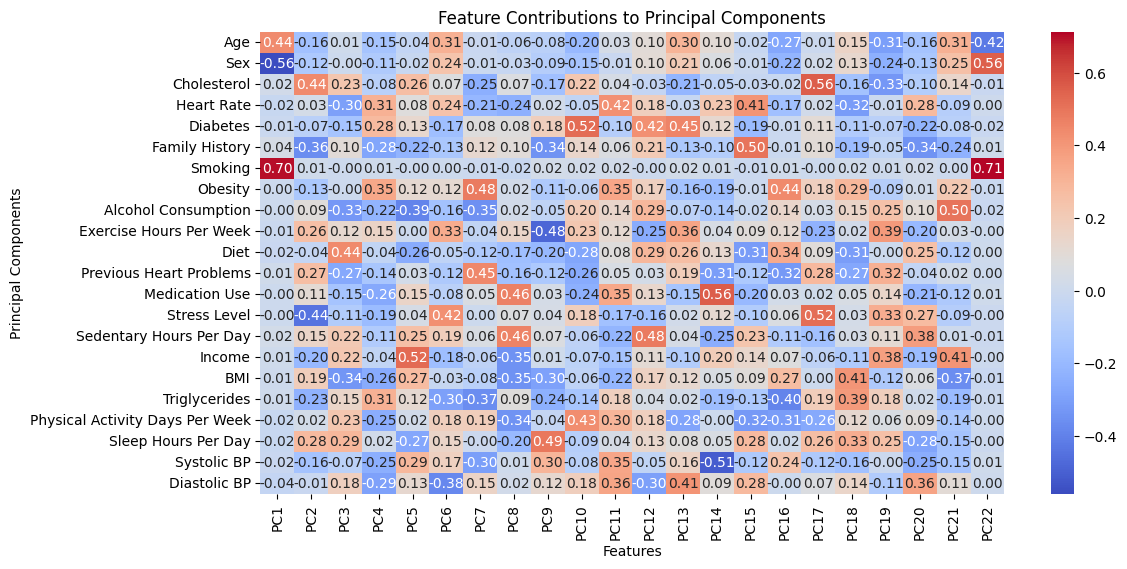

In [16]:
# Plot the feature contributions to PCA
plt.figure(figsize=(12, 6))
sns.heatmap(feature_importance.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Contributions to Principal Components")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

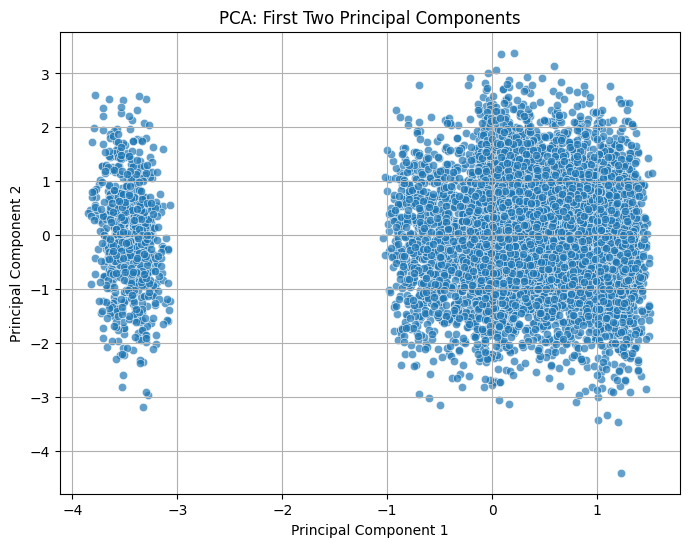

In [17]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_scaled)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid(True)
plt.show()

In [18]:
# If you have already scaled your data before, use the same scaled version
pca = PCA(n_components=3)  # Changing from 2 to 3 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply same transformation to test set

print("New Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

New Explained Variance Ratio: [0.0755653  0.04933362 0.04894086]
Total Explained Variance: 0.17383978218777035


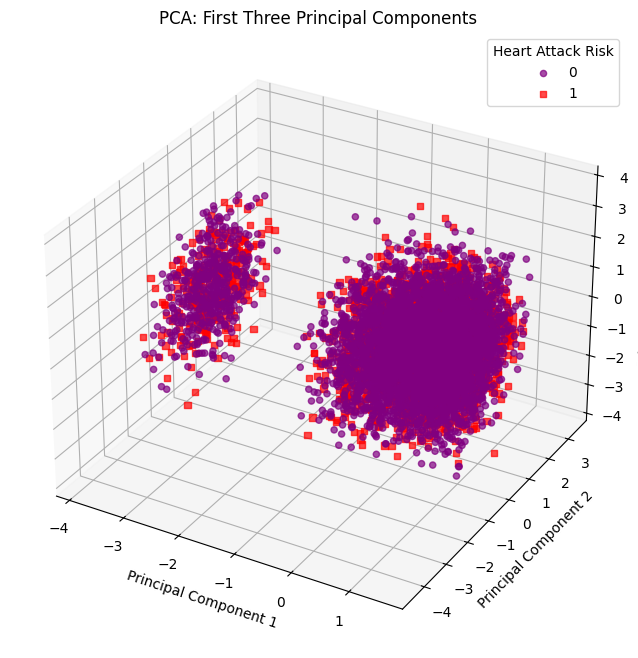

In [19]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors based on target labels
colors = ['purple', 'red']
markers = ['o', 's']
for target, color, marker in zip(y_train.unique(), colors, markers):
    indices = y_train == target
    ax.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], X_train_pca[indices, 2],
               c=color, label=target, marker=marker, alpha=0.7)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title("PCA: First Three Principal Components")
plt.legend(title="Heart Attack Risk")
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select numeric features only (after dropping categorical ones)
numeric_features = df.select_dtypes(include=['number'])

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Apply K-Means clustering BEFORE PCA
kmeans_before = KMeans(n_clusters=3, random_state=42)
clusters_before = kmeans_before.fit_predict(scaled_data)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means clustering AFTER PCA
kmeans_after = KMeans(n_clusters=3, random_state=42)
clusters_after = kmeans_after.fit_predict(pca_data)

# Compare clustering performance
silhouette_before = silhouette_score(scaled_data, clusters_before)
silhouette_after = silhouette_score(pca_data, clusters_after)

print(f"Silhouette Score Before PCA: {silhouette_before:.4f}")
print(f"Silhouette Score After PCA: {silhouette_after:.4f}")


Silhouette Score Before PCA: 0.0524
Silhouette Score After PCA: 0.4060


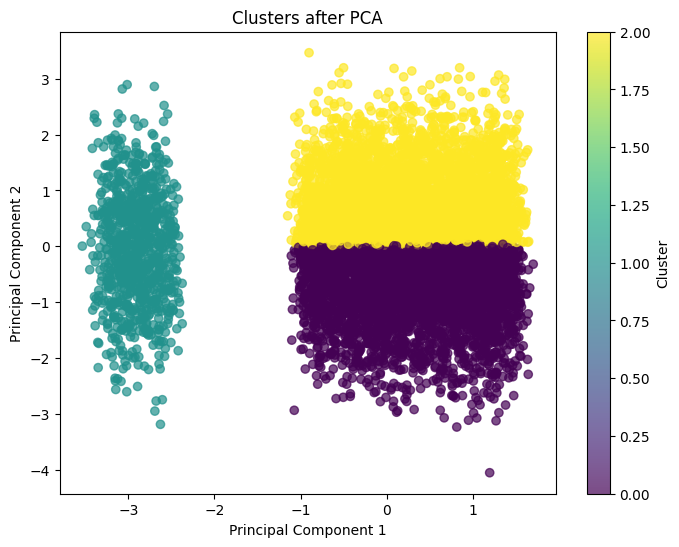

In [21]:
# Plot PCA results with clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_after, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
# Try PCA with 3 components
pca = PCA(n_components=3)
pca_data_3D = pca.fit_transform(scaled_data)

# Check new variance explained
print(pca.explained_variance_ratio_)


[0.07358782 0.05674257 0.0559261 ]


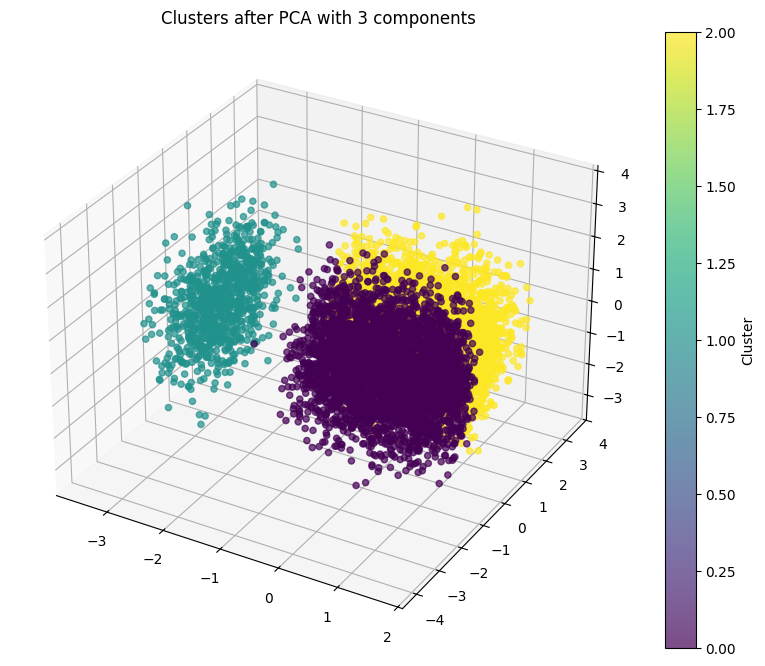

In [23]:
# plot pca with 3 components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
 
# Scatter plot
scatter = ax.scatter(pca_data_3D[:, 0], pca_data_3D[:, 1], pca_data_3D[:, 2], c=clusters_after, cmap='viridis', alpha=0.7)
plt.title('Clusters after PCA with 3 components')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical.fit_predict(pca_data)

silhouette_hierarchical = silhouette_score(pca_data, hierarchical_clusters)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")


Silhouette Score for Hierarchical Clustering: 0.3891
